<a href="https://colab.research.google.com/github/JohnDunbar21/Polars_CODE_THE_CITY/blob/main/Copy_of_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APUG 10 May 2023 Challenges
## Arturo Regalado
## Working with Polars and Pandas

In this notebook you will find the challenges for the APUG 10 May 2023 meeting. 

I have setup the required imports and url for the data. You will be working with the same Pokemon dataset used in the presentation. 

The format is as follows. I will prompt some questions and you should use polars to retrieve data to answer them. 

In [1]:
# Setup and main data
# For polars be sure to pip install polars["all"]
import polars as pl
import pandas as pd
import seaborn as sns

url = r"https://gist.githubusercontent.com/ritchie46/cac6b337ea52281aa23c049250a4ff03/raw/89a957ff3919d90e6ef2d34235e6bf22304f3366/pokemon.csv"
df = pl.read_csv(url)
df.head()


#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,bool
1,"""Bulbasaur""","""Grass""","""Poison""",318,45,49,49,65,65,45,1,false
2,"""Ivysaur""","""Grass""","""Poison""",405,60,62,63,80,80,60,1,false
3,"""Venusaur""","""Grass""","""Poison""",525,80,82,83,100,100,80,1,false
3,"""VenusaurMega V…","""Grass""","""Poison""",625,80,100,123,122,120,80,1,false
4,"""Charmander""","""Fire""",null,309,39,52,43,60,50,65,1,false


### Question 1. 

+ How many grass-type pokemons are there? Which are the top 5 with highest defense? Focus only on column Type 1. 

Tips: 

* Use the [filter](https://pola-rs.github.io/polars-book/user-guide/concepts/contexts/#filter) context, [aggregate and then count](https://pola-rs.github.io/polars-book/user-guide/expressions/aggregation/#filtering).

* Debug chains step-by-step. The chain should be all inside parenthesis.

* The workforce function pl.col() is used to extract a column from a data frame. 

* Basic steps for beginners:

  * Question 1. 
    * You can do this in one line. 
      * First filter for Grass-types
      * Then groupby "Type 1"
      * Then apply count. 
      * The structure is: `df.filter(#something).groupby(#something).count()`
      * Look for a similar operation in the Pokemon notebook. 
  
  * Question 2.
    * Start by filtering the grass-type pokemons.
    * Then select only the name, Type 1 and Defense columns. 
    * Sort the results from largest to smallest and then show only first 5. 

In [3]:
# Question 1.1

output = (
          df
            .filter(pl.col("Type 1") == "Grass")
            .groupby("Type 1")
            .agg(pl.count())
          )

output

Type 1,count
str,u32
"""Grass""",13


In [6]:
# Question 1.2

output = (
          df
            .filter(pl.col("Type 1") == "Grass")
            .select(
                pl.col("Name", "Type 1", "Defense")
            )
            .sort("Defense", descending=True)
        )

output.head(5)

Name,Type 1,Defense
str,str,i64
"""VenusaurMega V…","""Grass""",123
"""Tangela""","""Grass""",115
"""Vileplume""","""Grass""",85
"""Exeggutor""","""Grass""",85
"""Venusaur""","""Grass""",83


### Question 2. 

+ Between grass, fire and water types, which one has the highest average HP and Attack, and what are their standard deviations?

**Bonus points if you make a bar plot of the averages by group**

Advise for beginners: break down the steps and implement each one. Think your approach before writing code.

This way a large problem becomes more manageable. As a quick help the first step is to filter for the desired types. Then we need to do group calculations with use the [aggregate](https://pola-rs.github.io/polars-book/user-guide/expressions/aggregation/) function. 

Tips:

* As we are trying to filter for more than one type, using the `is_in(array)` method is useful. For example: `df.filter(pl.col("Type 1").is_in(["Poison", "Ice"]))`
* See the [API reference](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/aggregation.html) to check what is the function for the standard deviation. 
* To plot you might want to use seaborn.barplot(). This is the link to the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot). You will need to transform your data into a pandas dataframe in [long format](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/api/polars.DataFrame.melt.html#polars.DataFrame.melt) using `df.melt`. 

In [16]:
# Question 2.1

output = (
          df
            .filter(pl.col("Type 1").is_in(["Grass", "Fire", "Water"]))
            .groupby("Type 1")
            .agg([
                pl.col("HP").mean().round(1).alias("Average HP"),
                pl.col("HP").std().alias("HP Std"),
                pl.col("Attack").mean().round(1).alias("Average Attack"),
                pl.col("Attack").std().alias("Attack Std")
            ])
        )

output

Type 1,Average HP,HP Std,Average Attack,Attack Std
str,f64,f64,f64,f64
"""Fire""",65.9,16.617216,88.6,26.563732
"""Water""",67.0,28.635041,74.2,29.443074
"""Grass""",66.2,15.159409,72.9,21.140252


Text(0.5, 1.0, 'Average HP and Attack Vs. Type of Pokemon')

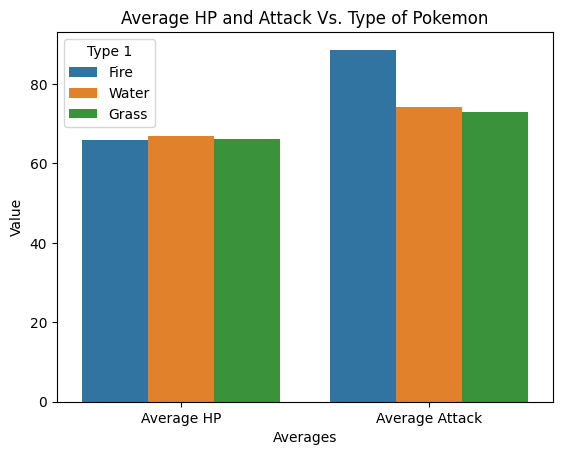

In [21]:
# Question 2.2
from matplotlib import pyplot as plt

pandas_form = (
                output.melt(
                    id_vars = "Type 1",
                    value_vars = ["Average HP", "Average Attack"],
                    variable_name = "Averages",
                    value_name = "Value"
                )
                .to_pandas()
              )

sns.barplot(data = pandas_form, y = "Value", x = "Averages", hue = "Type 1", orient = "v")
plt.title("Average HP and Attack Vs. Type of Pokemon")

### Question 3. 

+ Are legendary pokemons stronger than regular pokemons?
+ Show the stats that lead to your conclusion. 

Use all the information in the pokemon notebook and in the above questions to figure out an answer to the analysis. 

Text(0.5, 1.0, 'Legendary Vs. Standard Pokemon Statistics')

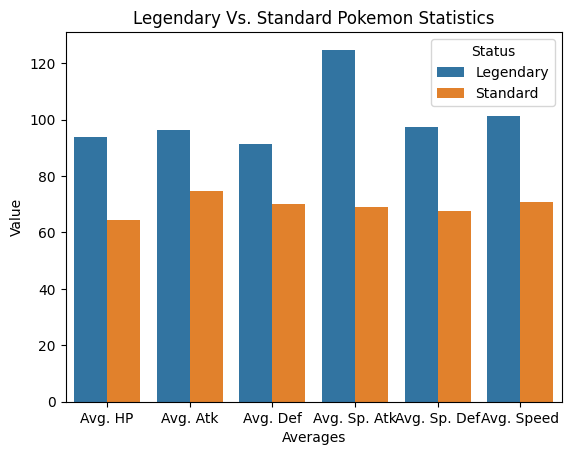

In [28]:
output = (
          df
            .with_columns(
                pl.when(pl.col("Legendary") == False)
                .then("Standard")
                .otherwise("Legendary")
                .alias("Status")
            )
            .groupby("Status")
            .agg([
                pl.col("HP").mean().round(1).alias("Avg. HP"),
                pl.col("Attack").mean().round(1).alias("Avg. Atk"),
                pl.col("Defense").mean().round(1).alias("Avg. Def"),
                pl.col("Sp. Atk").mean().round(1).alias("Avg. Sp. Atk"),
                pl.col("Sp. Def").mean().round(1).alias("Avg. Sp. Def"),
                pl.col("Speed").mean().round(1).alias("Avg. Speed")
            ])
          )

pandas_form = (
                output.melt(
                    id_vars = "Status",
                    value_vars = ["Avg. HP", "Avg. Atk", "Avg. Def", "Avg. Sp. Atk", "Avg. Sp. Def", "Avg. Speed"],
                    variable_name = "Averages",
                    value_name = "Value"
                )
                .to_pandas()
          )
#output.head(5)
sns.barplot(data = pandas_form, y = "Value", x = "Averages", hue = "Status")
plt.title("Legendary Vs. Standard Pokemon Statistics")